In [24]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [228]:
df = pd.read_csv(os.path.join("..", "coffee_ratings.csv"))
df.head()

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,89.92,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,89.00,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,88.83,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [250]:
coffee = df[['total_cup_points', 'species','number_of_bags', 'aroma','flavor','aftertaste', 'acidity',
               'body', 'balance', 'uniformity', 'clean_cup', 'sweetness', 'cupper_points','moisture',
               'category_one_defects', 'category_two_defects', 'quakers','altitude_mean_meters']]
coffee.head()

,total_cup_points,species,number_of_bags,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,moisture,category_one_defects,category_two_defects,quakers,altitude_mean_meters
0,90.58,Arabica,300,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,0.12,0,0,0.0,2075.0
1,89.92,Arabica,300,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,0.12,0,1,0.0,2075.0
2,89.75,Arabica,5,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,0.00,0,0,0.0,1700.0
3,89.00,Arabica,320,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,0.11,0,2,0.0,2000.0
4,88.83,Arabica,300,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,0.12,0,2,0.0,2075.0


In [233]:
#coffee = coffee.drop(columns=['species_Robusta'])
#coffee.head()

In [251]:
coffee = coffee.dropna()
coffee.head()

,total_cup_points,species,number_of_bags,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,moisture,category_one_defects,category_two_defects,quakers,altitude_mean_meters
0,90.58,Arabica,300,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,0.12,0,0,0.0,2075.0
1,89.92,Arabica,300,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,0.12,0,1,0.0,2075.0
2,89.75,Arabica,5,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,0.00,0,0,0.0,1700.0
3,89.00,Arabica,320,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,0.11,0,2,0.0,2000.0
4,88.83,Arabica,300,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,0.12,0,2,0.0,2075.0


In [316]:
#X = coffee[['number_of_bags', 'aroma', 'flavor', 'aftertaste','acidity', 'body','balance',
          # 'uniformity','clean_cup','sweetness','cupper_points','moisture','category_one_defects','category_two_defects',
          # 'quakers','altitude_mean_meters']].values
##X = coffee["aroma"].values.reshape(-1,1)
X = coffee[['altitude_mean_meters']].values
y = coffee["total_cup_points"].values.reshape(-1,1)
print(X.shape, y.shape)

(1108, 1) (1108, 1)


In [317]:
X

array([[2075.],
       [2075.],
       [1700.],
       ...,
       [3000.],
       [  40.],
       [ 795.]])

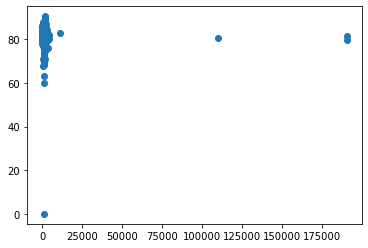

In [318]:
plt.scatter(X ,y)

In [319]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [320]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [321]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [322]:
##scaler = MinMaxScaler()
##X_scaled = scaler.fit_transform(X_train)

In [323]:
##kmeans.fit(X_scaled)

In [324]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, max_iter=600, algorithm = 'auto')

In [325]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(max_iter=600, n_clusters=5, n_jobs=1, precompute_distances='auto')

In [326]:
kmeans.fit(X_train)


KMeans(max_iter=600, n_clusters=5)

In [336]:
correct = 0
for i in range(len(X_train)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.0


In [337]:
kmeans.fit(X_train)

KMeans(max_iter=600, n_clusters=5)

In [340]:
predicted_clusters = kmeans.predict(X_train)

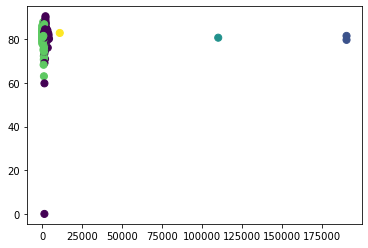

In [347]:
plt.scatter(X_train, y_train, c=predicted_clusters, s=50, cmap='viridis')

In [342]:
centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [343]:
centers

array([[  1600.],
       [190164.],
       [110000.],
       [   934.],
       [ 11000.]])